![DSME-logo](./utils/DSME_logo.png)

#  Reinforcement Learning and Learning-based Control

<p style="font-size:12pt";> 
<b> Prof. Dr. Sebastian Trimpe, Dr. Friedrich Solowjow </b><br>
<b> Institute for Data Science in Mechanical Engineering (DSME) </b><br>
<a href = "mailto:rllbc@dsme.rwth-aachen.de">rllbc@dsme.rwth-aachen.de</a><br>
</p>

---
Notebook Authors: Lukas Kesper, Emma Cramer

In this example, we use Q-learning to find an optimal policy for the Frozen Lake environment from ["Gymnasium."](https://gymnasium.farama.org/index.html#). An example of the environment is shown below. The goal is to move the penguin to the fish without entering one of the ice holes. The state is the position on the grid, and we can move the penguin into the same four directions in each state.

<img src="./utils/frozen_lake.gif" alt="Example of Frozen_Lake" width="800">   

Reference: [Reinforcement Learning: An Introduction, by Richard S. Sutton and Andrew G. Barto](http://incompleteideas.net/book/the-book-2nd.html), 

# Preliminaries
Here you can find library imports and some information about the Q-Learning algorithm.

## Library Imports

In [67]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import custom_envs
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
from IPython.display import Video
from IPython.display import display
from screeninfo import get_monitors
from typing import Optional
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Q-Learning
Temporal Difference (TD) algorithms are a class of algorithms capable of finding the optimal policy for an environment without needing a model of the environment. In this example, we use the fact, that the action space is independent of the state space. This is a common assumption in reinforcement learning implementations, which allows for a straightforward presentation of the algorithm. However, there are some environments, where this assumption doesn't hold, e.g. the recycling robot from the lecture.

Our `Agent` interacts with the environment to obtain an optimal policy via Q-learning. Q-learning is an off-policy algorithm, hence, the learned Q-function directly approximates the optimal action-value function, independent of the policy being used for sampling. Nevertheless, the policy is still used for determining the state-action pairs that are visited and updated. We show the algorithm below.

<img src="./utils/Q-learning.png" alt="Q-learning algorithm" width="500">   

# Environment Setup
We setup a 4x4 gridworld environment.

## First steps with the Gym interface

An environment that follows the [gym interface](https://stable-baselines3.readthedocs.io/en/master/guide/custom_env.html) is quite simple to use.
It provides to this user mainly three methods:
- `reset()` called at the beginning of an episode, it returns an observation
- `step(action)` called to take an action with the environment, it returns the next observation, the immediate reward, whether the episode is over and additional information
- (Optional) `render(method='human')` which allows to visualize the agent in action.

It is further specified by two properties:
- `observation_space` which describes the type and shape of the observation
- `action_space` which describes the action space, so the type of action that can be taken

You can find our custom frozen lake environment in tabular_examples/custom_envs/envs/frozen_lake.py.

## Task 1: Setting our own custom environment
We create a custom environment using `Gymnasium` and a custom map.
Tasks:
- create a map that specifies the location of the start state, frozen states, holes and the goal state.
- generate an environment using [gym.make()](https://www.gymlibrary.dev/index.html).
- print the state and action space for your environment
- reset your environment and retrieve (+print) the start state
- step in your environment and print the next state and the resulting reward

In [69]:
# map = 
# env = 
#
#
# 
#
# Sample a random action
# action
#
# step in the environment
#
#

Discrete(16)
Discrete(4)
Sampled action: 3
obs=0, reward=0.0, done? False


# Agent Setup
Here we will initialize and agent and its policy.

## Task 2: Initializing the agent
Now we set up an agent for training. Initially, our Q-function only consists of zeros, but will later change during training.

**Tasks**: 
- Initialize the Q-function `action_value_fn` to zero. You can use np.zeros(). What dimensions should this Q-function have?
- Just like in the algorithm above, we use an $\epsilon$-greedy policy. The randomness can be set via the parameter `epsilon`. Set epsilon to 0.1.
- Additionally, there exists a parameter, `learning_rate`, that is used for updates of the Q-function. Set this to 0.05.
- We use a discount factor 'gamma' of 0.99.

In [70]:
#
#
#
#

## Task 3: Setting up the policy
Now we define the epsilon greedy policy.
Tasks:
- Complete the function for the random policy. 
- Complete the epsilon-greedy policy such that with a probability of epsilon it returns a random action and with a probability of 1-epsilon returns the best action.

Hint: You can use np.random.choice().

In [71]:
### Random policy
#def get_random_action():
#
#        return 
#
### Greedy policy
#def get_best_action(obs):
#       
#
#        return 
#
### Define epsilon-greedy policy
#def epsilon_greedy_policy(obs, epsilon):
#
#
#
#
#
#
#
#    return 

# Preparing the Evaluation
For evaluation, we require a method that visualizes the Q-function (`visualize`) and a method that evaluates the resulting policy (`evaluate`). We add these methods below.

In [68]:
def visualize(epoch, action_value_fn): 
    fig, ax=plt.subplots(figsize=(7,5))
    lines = 4
    rows = 4        
    # Define grid positions:
    pos_x_left = 0.2
    pos_x_mid = 0.5
    pos_x_right = 0.8
    pos_y_up = 0.2
    pos_y_mid = 0.5
    pos_y_down = 0.8
    grid_size = {'x': lines, 'y': rows}
    def gridcreator(pos_x, pos_y):
        grid = []
        for i in range(grid_size['x']):
            for j in range(grid_size['y']):
                x = pos_x + j
                y = pos_y + i
                grid.append((x, y))
        return grid
    top = action_value_fn[:,3].reshape((lines, rows))
    top_value_positions = gridcreator(pos_x_mid, pos_y_up)
    right = action_value_fn[:,2].reshape((lines, rows))
    right_value_positions = gridcreator(pos_x_right, pos_y_mid)
    bottom = action_value_fn[:,1].reshape((lines, rows))
    bottom_value_positions = gridcreator(pos_x_mid, pos_y_down)
    left= action_value_fn[:,0].reshape((lines, rows))
    left_value_positions = gridcreator(pos_x_left, pos_y_mid)
    # Define triangles
    ax.set_ylim(lines, 0)
    anchor_points = np.array([[0,0],[0,1],[.5,.5],[1,0],[1,1]]) # Corner coordinates
    corner_indizes = np.array([[0,1,2], [0,2,3],[2,3,4],[1,2,4]]) # Corner indices
    xy_coordinates = np.zeros((lines * rows * 5,2))
    triangles = np.zeros((lines * rows * 4, 3))
    for i in range(lines):
        for j in range(rows):
            k = i*rows+j
            xy_coordinates[k*5:(k+1)*5,:] = np.c_[anchor_points[:,0]+j, 
                                                  anchor_points[:,1]+i]
            triangles[k*4:(k+1)*4,:] = corner_indizes + k*5
    colours = np.c_[left.flatten(), top.flatten(), 
            right.flatten(), bottom.flatten()].flatten()
    ax.triplot(xy_coordinates[:,0], xy_coordinates[:,1], triangles, 
               **{"color":"k", "lw":1})
    tripcolor = ax.tripcolor(xy_coordinates[:,0], xy_coordinates[:,1], triangles, 
                             facecolors=colours, **{"cmap": "coolwarm"})
    ax.margins(0)
    ax.set_aspect("equal")
    fig.colorbar(tripcolor)
    # Define text:
    textsize = 10
    for i, (xi,yi) in enumerate(top_value_positions):
        plt.text(xi,yi,round(top.flatten()[i],2), size=textsize, color="w", 
                 ha='center', va='center')
    for i, (xi,yi) in enumerate(right_value_positions):
        plt.text(xi,yi,round(right.flatten()[i],2), size=textsize, color="w", 
                 ha='center', va='center')
    for i, (xi,yi) in enumerate(left_value_positions):
        plt.text(xi,yi,round(left.flatten()[i],2), size=textsize, color="w", 
                 ha='center', va='center')
    for i, (xi,yi) in enumerate(bottom_value_positions):
        plt.text(xi,yi,round(bottom.flatten()[i],2), size=textsize, color="w", 
                 ha='center', va='center')
    ax.axis('off')
    plt.title("Q-Function, Epoch "+str(epoch))
    # add lines for separation
    for i in range(lines+1):
        x = [0, rows]
        y = [i, i]
        plt.plot(x,y, color='black')
    for i in range(rows+1):
        x = [i, i]
        y = [0, lines]
        plt.plot(x,y, color='black')
    plt.show()

def evaluate(env, obs, file, num_runs=5):
    frames = []  # collect rgb_image of agent env interaction
    video_created = False
    for _ in range(num_runs):
        done = False
        obs, info = env.reset()
        out = env.render()
        frames.append(out)
        while not done:
            action = get_best_action(obs) 
            obs, reward, done, truncated, info = env.step(action)
            out = env.render()
            frames.append(out)              
    # create animation out of saved frames
    if all(frame is not None for frame in frames):
        fig = plt.figure(figsize=(10, 6))
        plt.axis('off')
        img = plt.imshow(frames[0])
        def animate(index):
            img.set_data(frames[index])
            return [img]
        anim = FuncAnimation(fig, animate, frames=len(frames), interval=20)
        plt.close()
        anim.save(file, writer="ffmpeg", fps=5)

# Training
Lastly, we train an agent and visualize it's state-action function.

## Task 4: Training the Agent
Now we train our agent. 
Tasks:
1.
- Iterate over the number of episodes
- for each episode reset the environment and retrieve the start state

2. Then, during each episode: (= while the episode is not done) 
- choose the next action according to the epsilon greedy policy
- do one step in the environment using this action

3. Compute the TD update:
- retrieve the best possible action in the next state $a*= max_a Q(s',a)$
- update the td_target to ...
- compute the new Q-value
- replace the current value in your Q-table with the new value
- set your current state to be the next state

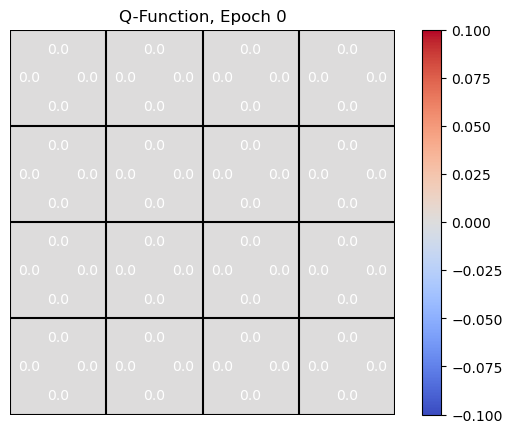

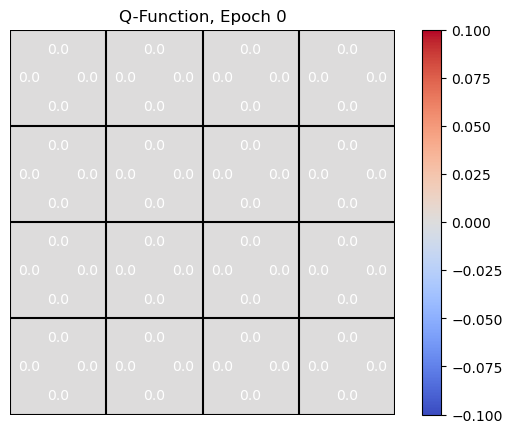

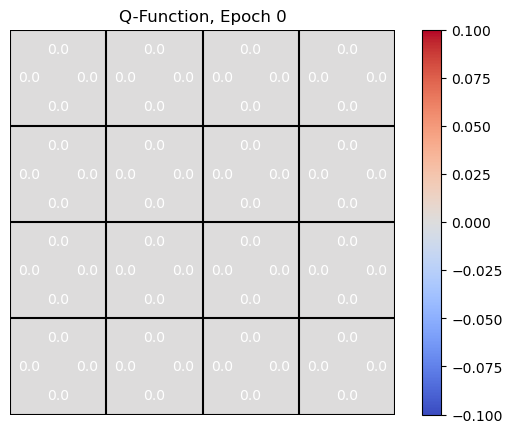

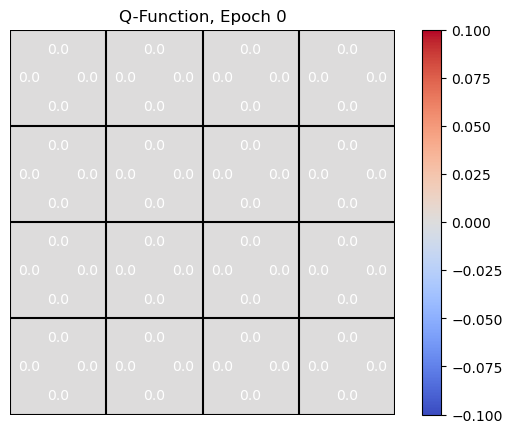

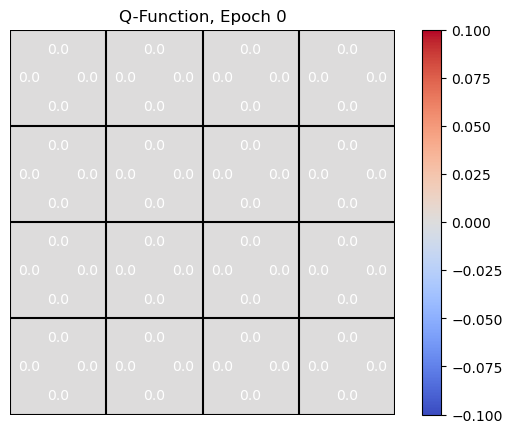

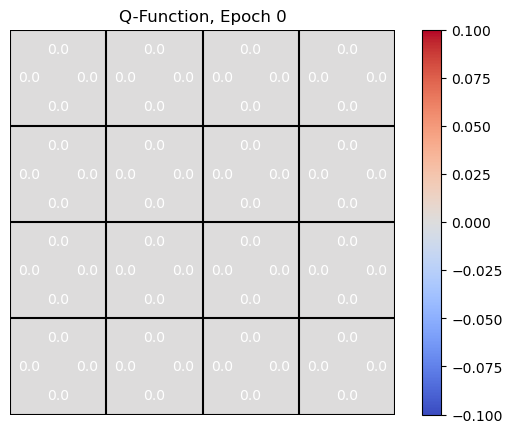

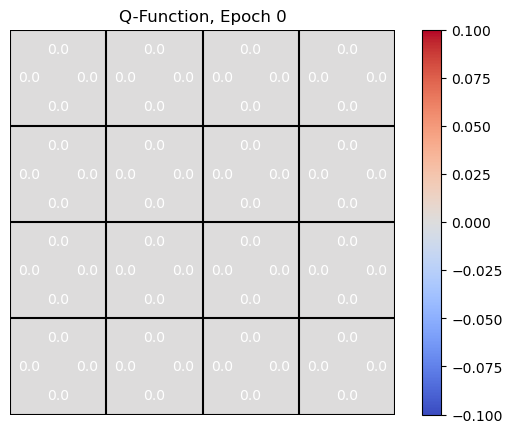

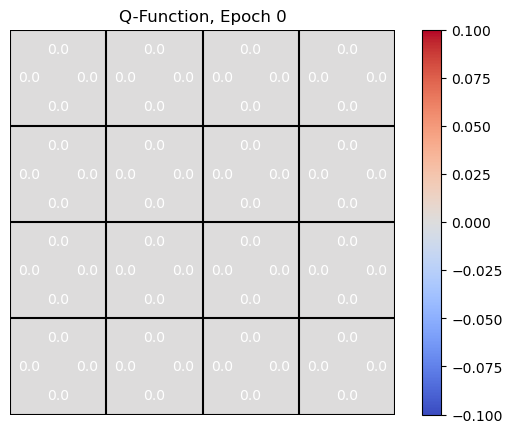

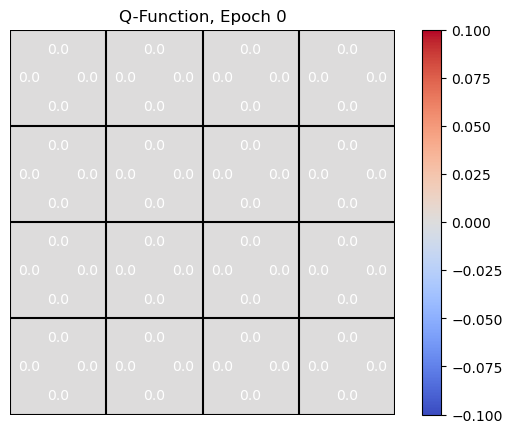

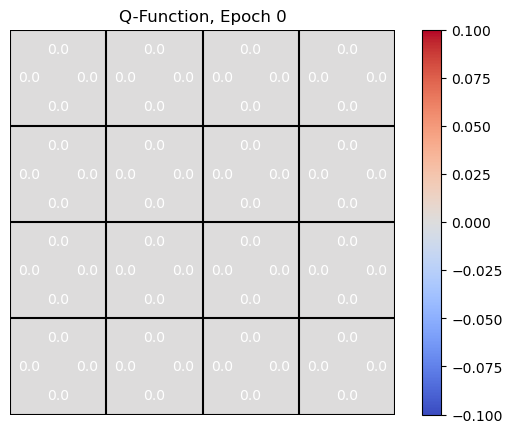

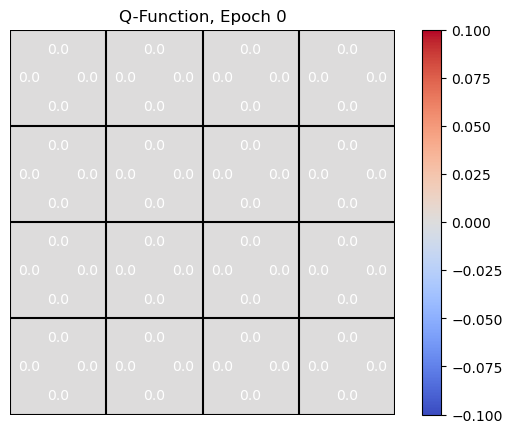

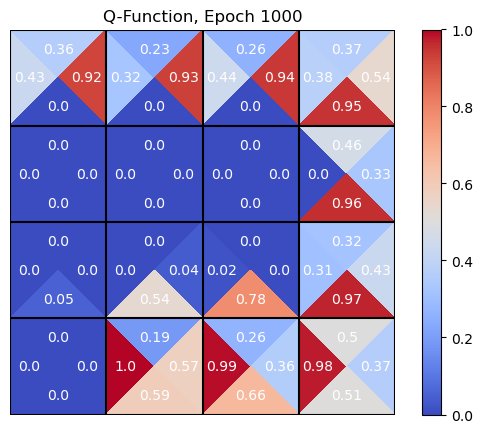

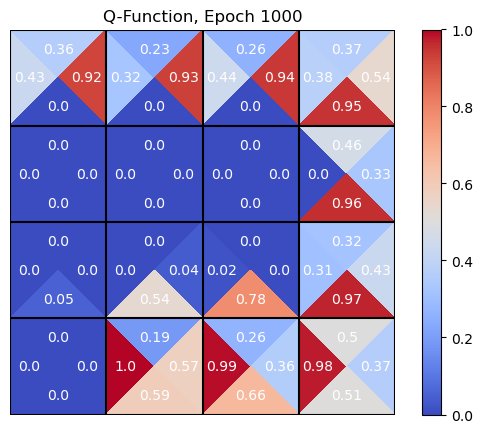

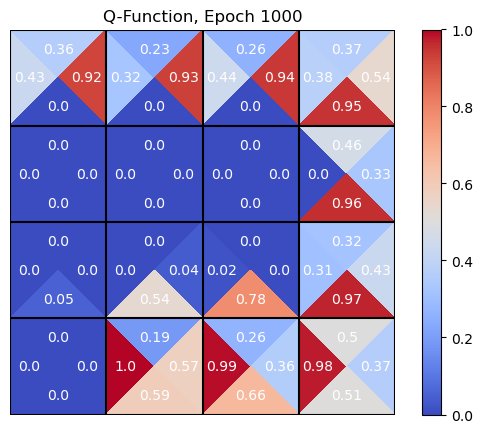

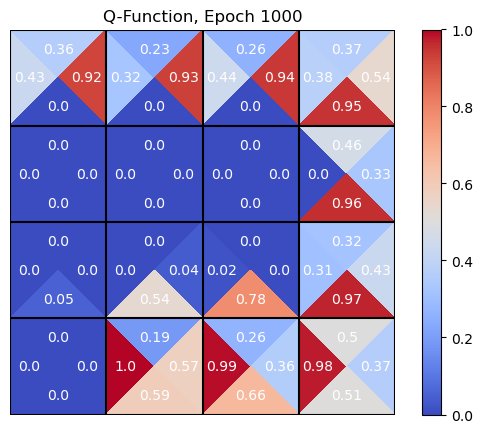

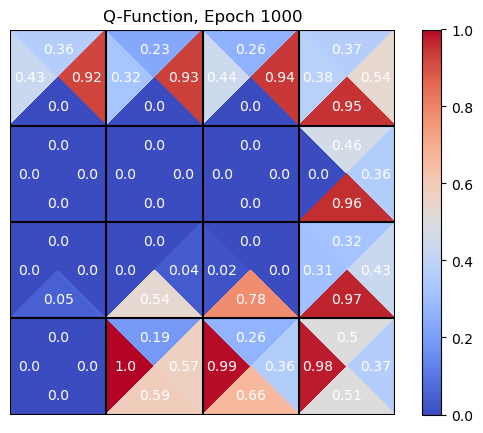

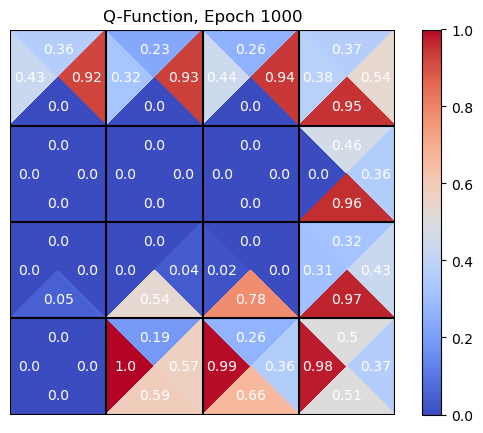

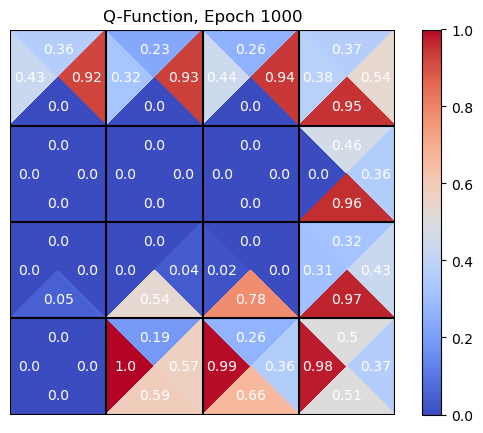

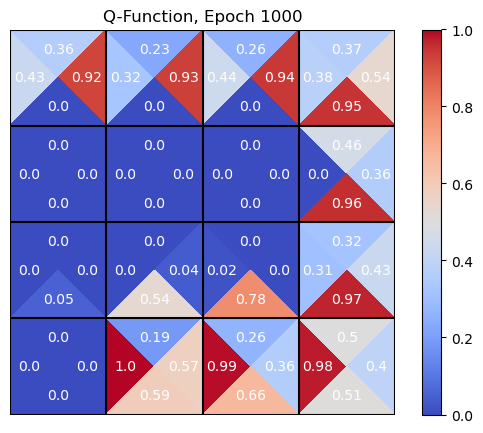

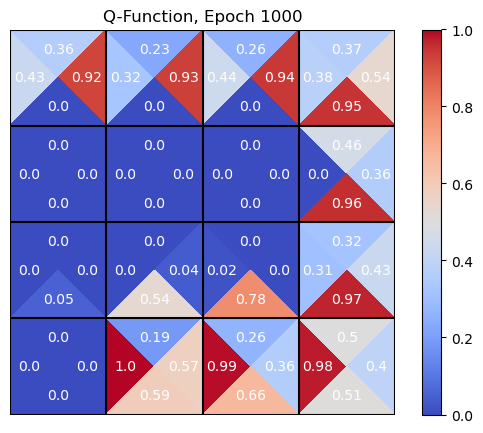

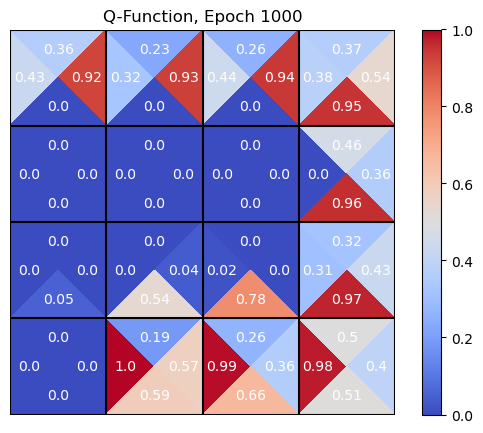

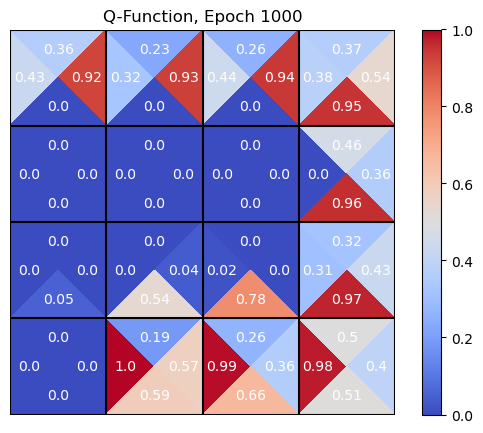

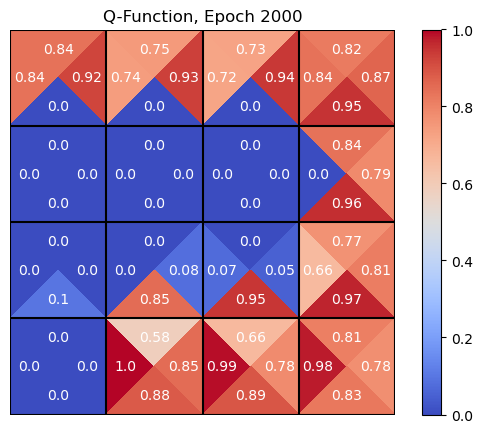

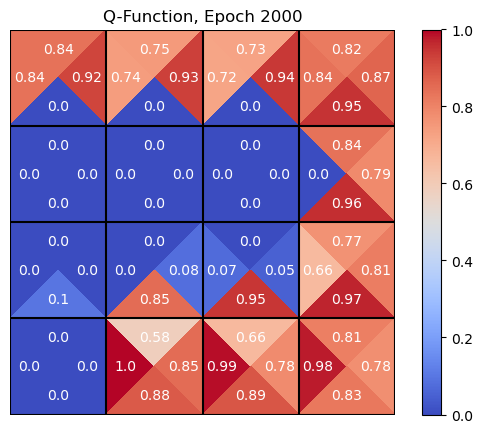

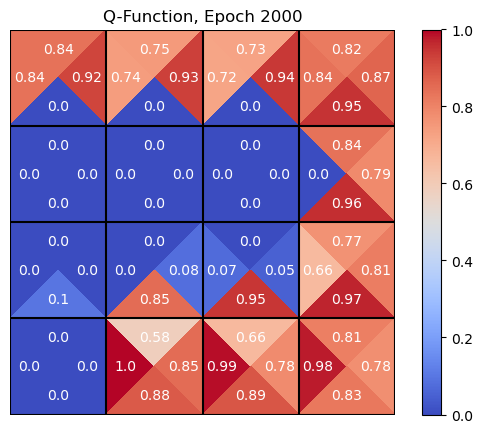

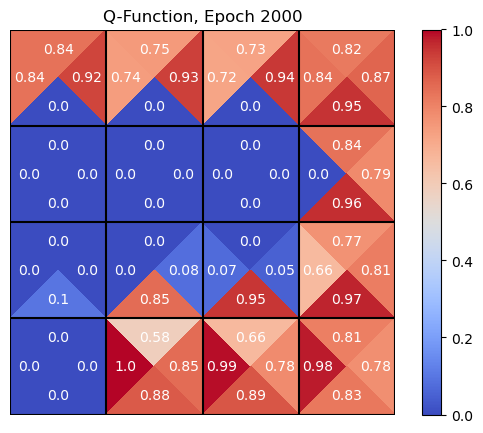

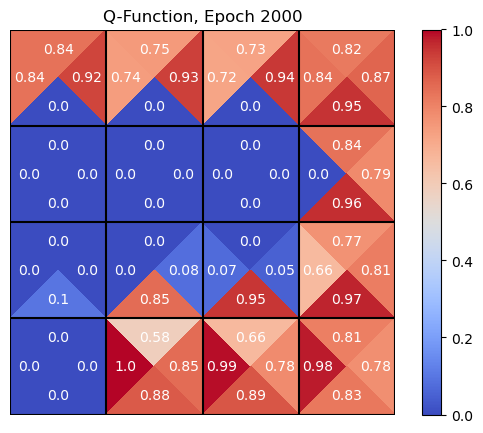

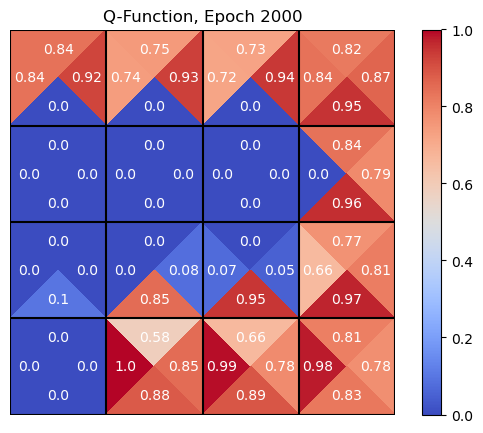

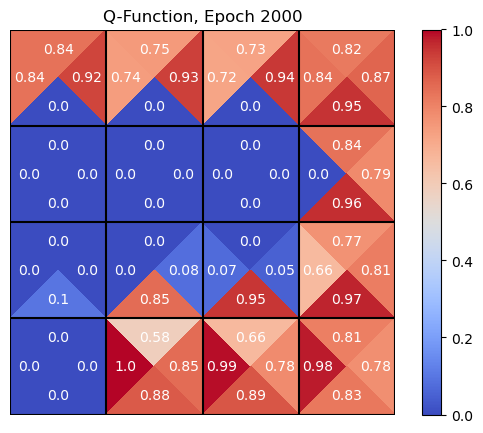

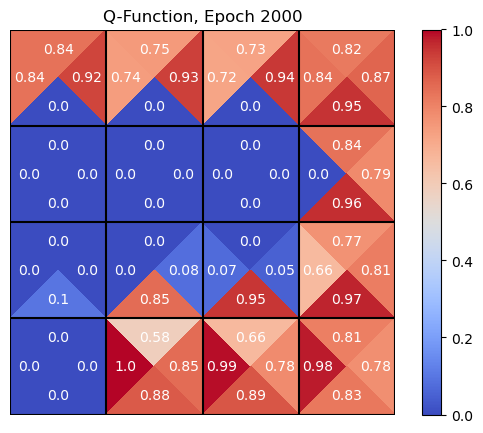

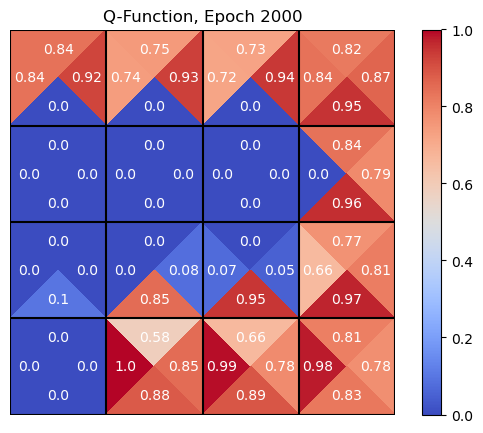

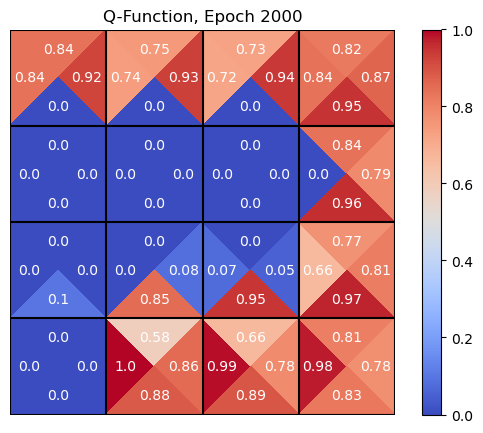

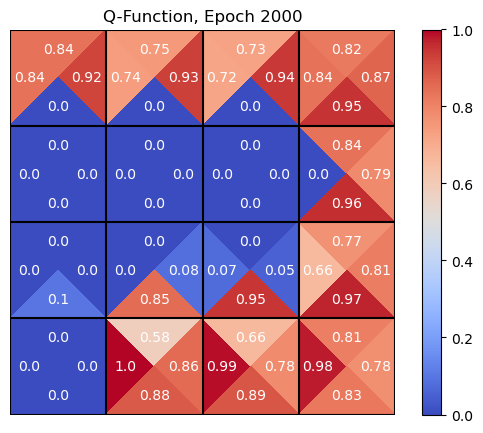

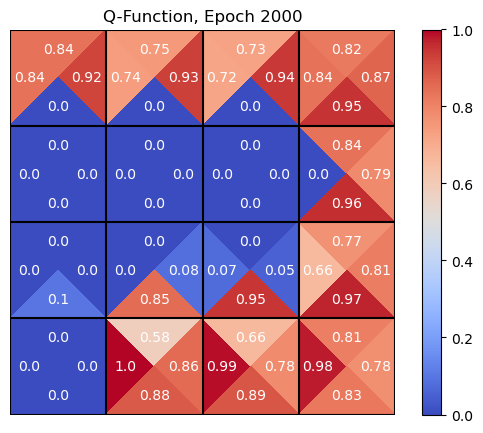

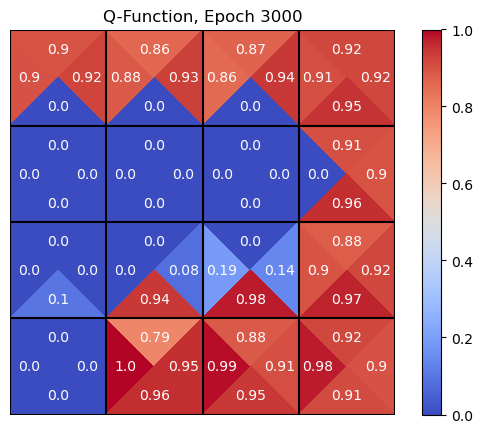

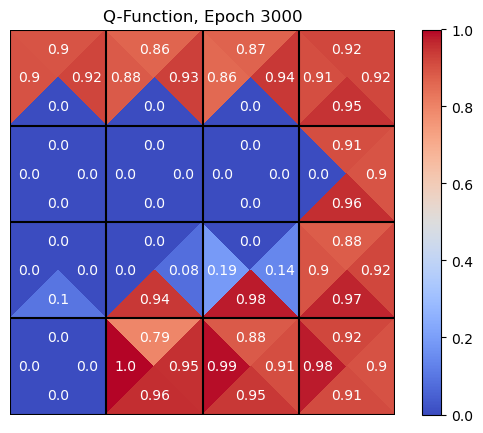

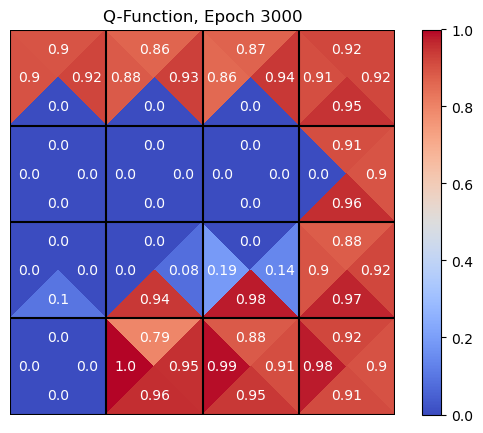

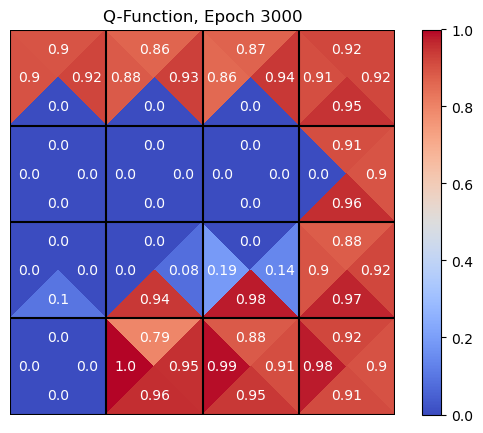

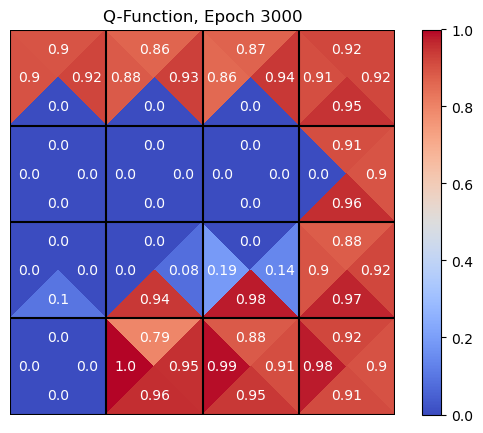

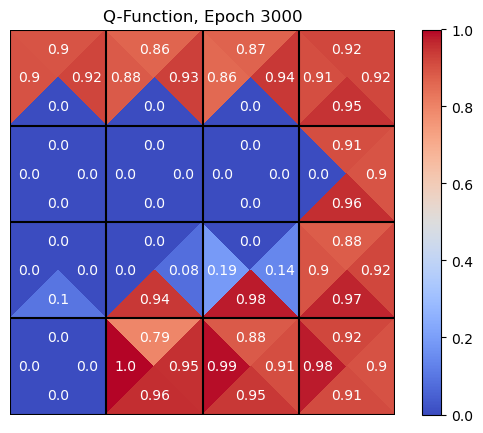

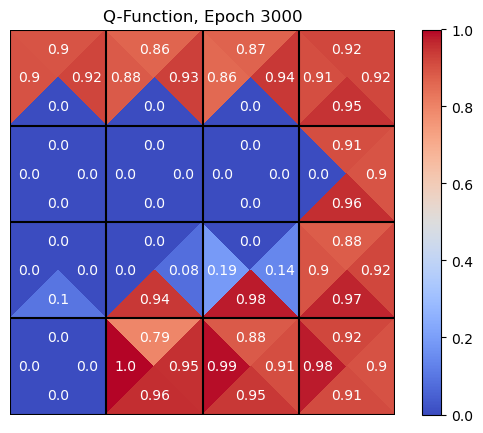

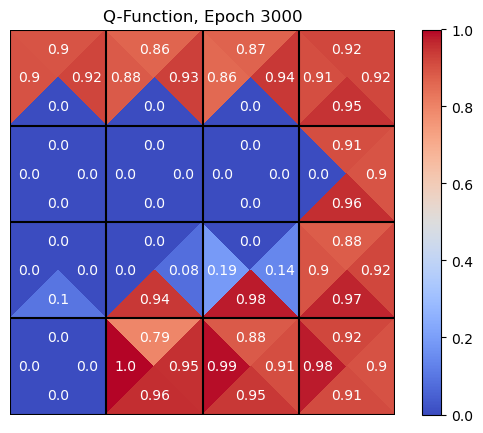

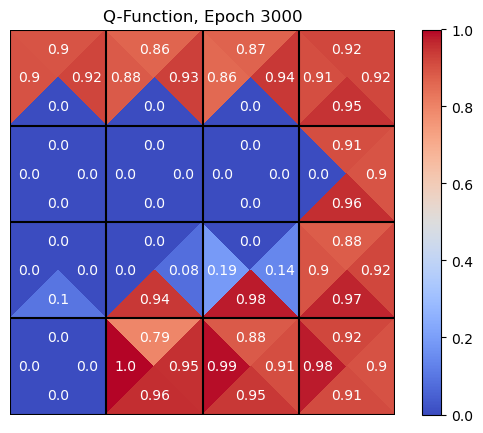

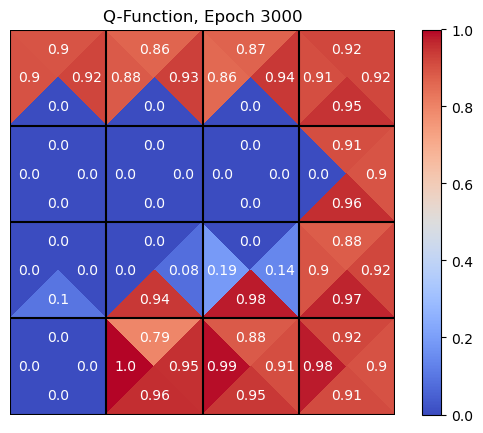

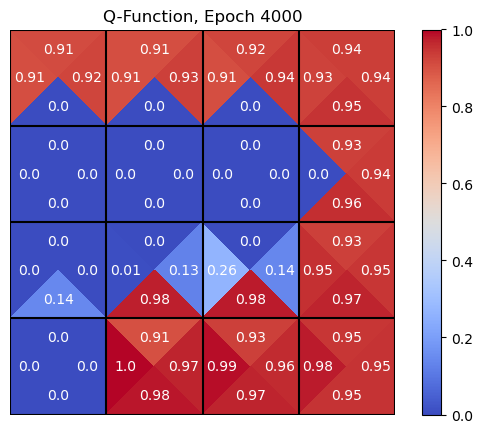

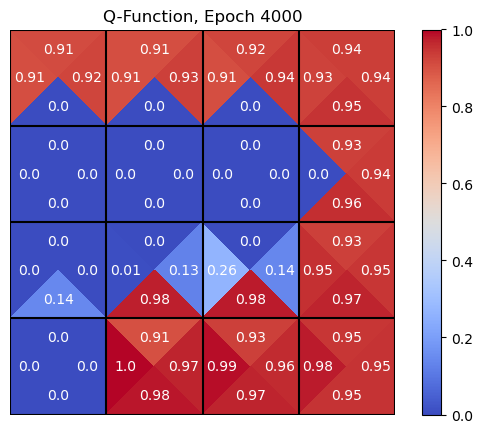

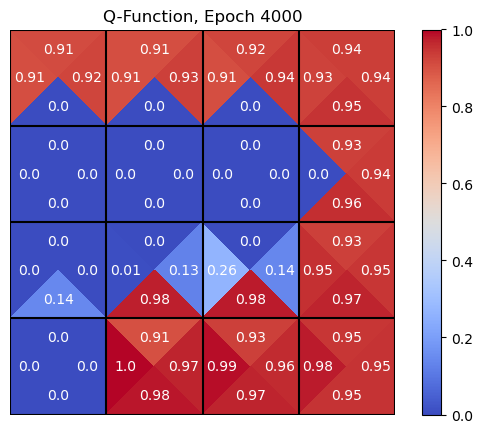

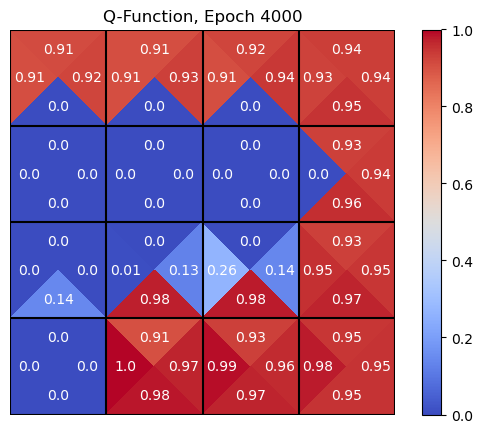

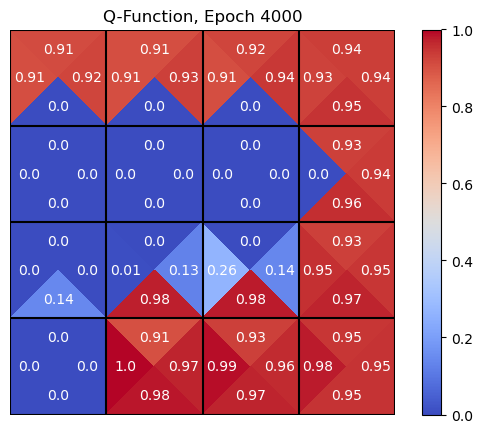

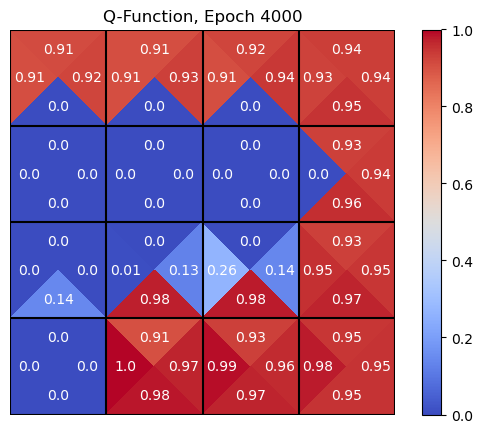

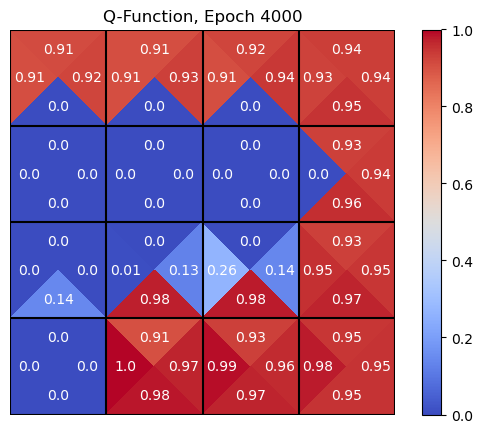

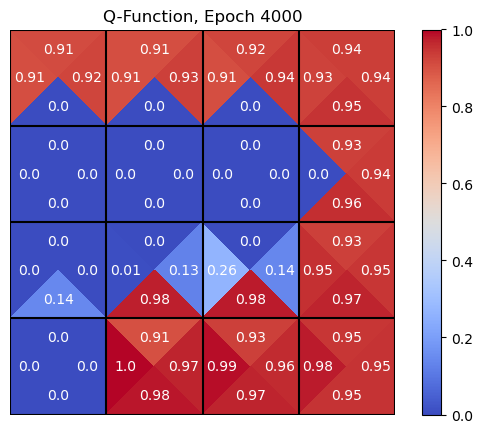

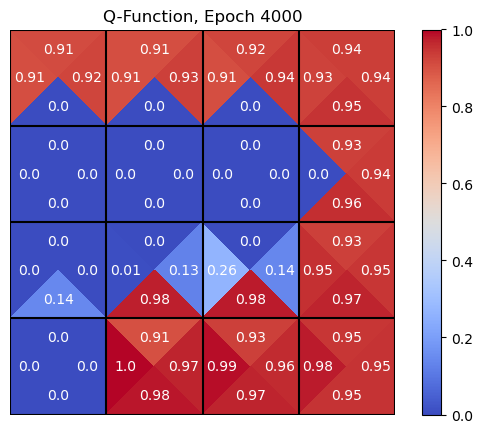

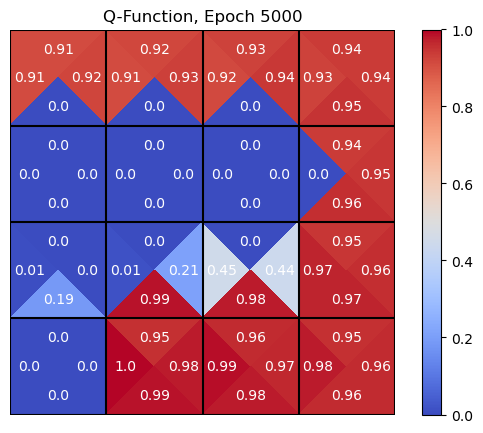

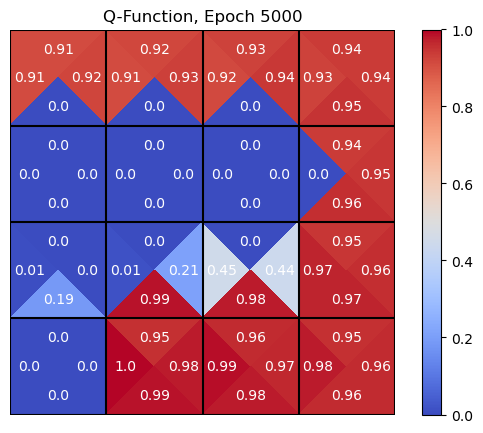

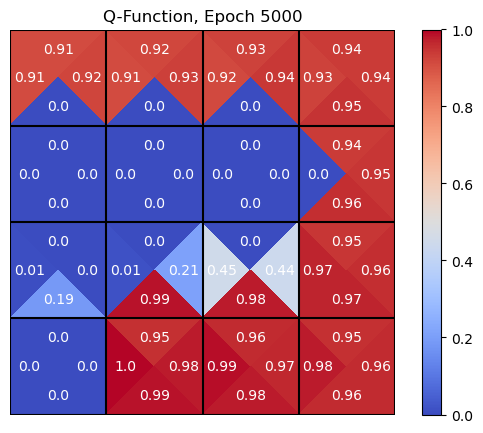

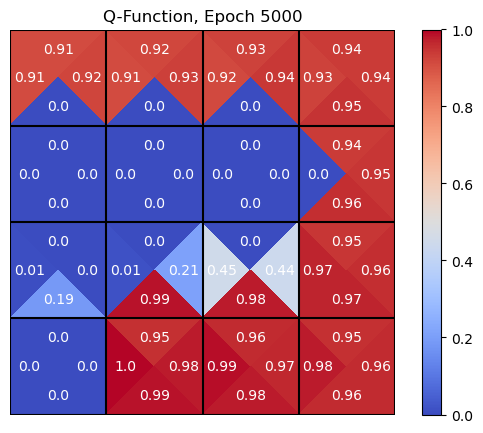

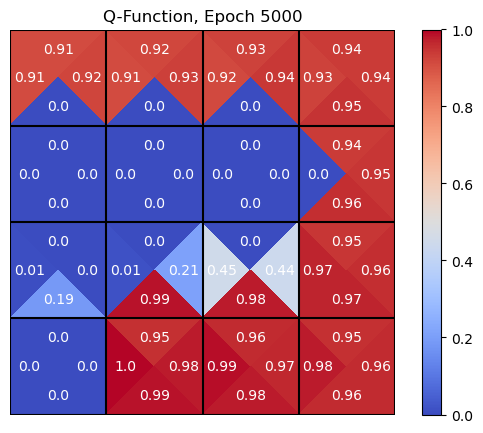

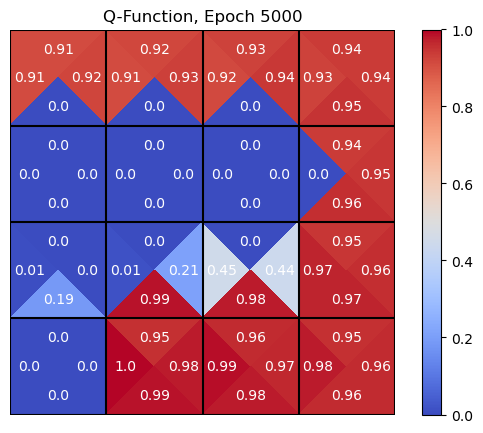

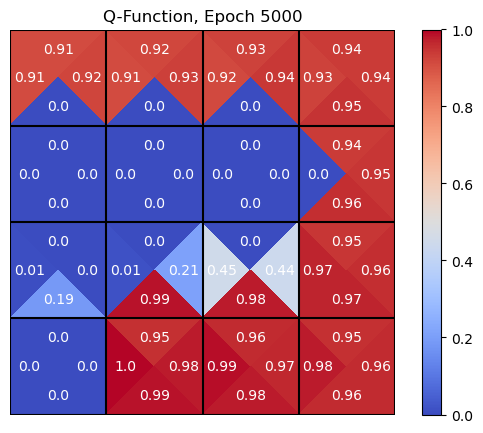

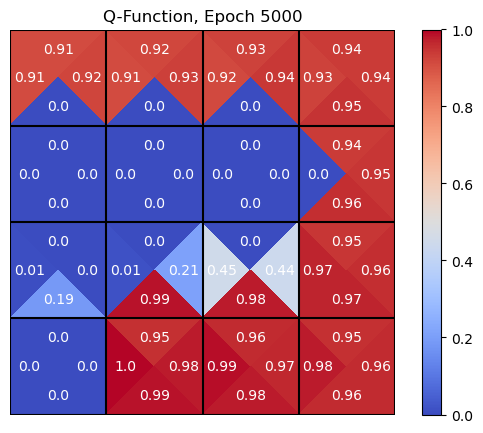

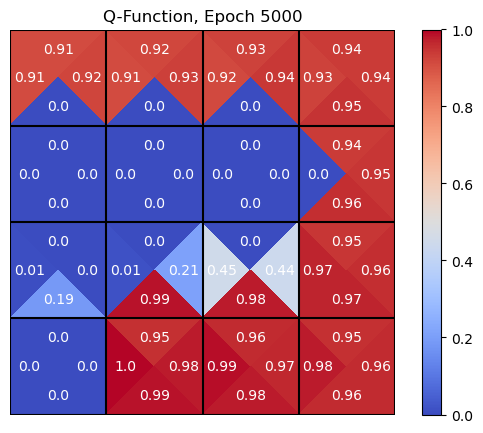

In [72]:
#
#
# Reset the environment and pick the first action
#for i in range(num_episodes+1):
#    obs, info =   # most values are replaced in first env.step(),
#    done = False
#
#
#
#
#
#
#
#        if i % 1000 == 0:
#            visualize(i, action_value_fn)

### Evaluation

Above, we can see the evolution of the Q-function during training. The coloring already indicates what a greedy policy can look like. Below we show a greedy policy in the environment.

In [73]:
env = gym.make('CustomFrozenLake-v1', render_mode='rgb_array', desc=map, is_slippery=False)
video = "q-learning.mp4"
evaluate(env, obs, video, num_runs=5)
Video(video, html_attributes="loop autoplay")